In [2]:
from tensorflow.keras.layers import Dense,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [3]:
train_data = '/kaggle/input/bird-species-classification/train_data/train_data'
test_data ='/kaggle/input/bird-species-classification/test_data/test_data'

In [4]:
train_gen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1.0/255.0)



In [5]:
train = train_gen.flow_from_directory(train_data,
                                      target_size=(224, 224),
                                      batch_size=22,
                                      class_mode='categorical')

test = test_gen.flow_from_directory(test_data,
                                    target_size=(224, 224),
                                    batch_size=22,
                                    class_mode='categorical')

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [6]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input

In [9]:
vgg = VGG16(include_top=False,
            weights='imagenet', 
            input_shape=(224,224,3))

In [10]:
for layer in vgg.layers:
  print(layer)

In [11]:
for layer in vgg.layers:
  layer.trainable=False

In [12]:
x = Flatten()(vgg.output)

In [13]:
prediction = Dense(16,activation='softmax')(x)

In [14]:
model = Model(inputs=vgg.input,
              outputs=prediction)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit_generator(train,validation_data=test,epochs=20,steps_per_epoch=len(train),validation_steps=len(test))

/tmp/ipykernel_28/985259952.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,validation_data=test,epochs=20,steps_per_epoch=len(train),validation_steps=len(test))


Epoch 1/20
7/7 [==============================] - 74s 9s/step - loss: 3.4285 - accuracy: 0.1467 - val_loss: 2.8801 - val_accuracy: 0.1401
Epoch 2/20
7/7 [==============================] - 44s 7s/step - loss: 1.5522 - accuracy: 0.5267 - val_loss: 2.8266 - val_accuracy: 0.2994
Epoch 3/20
7/7 [==============================] - 41s 6s/step - loss: 0.8751 - accuracy: 0.7333 - val_loss: 2.6499 - val_accuracy: 0.2803
Epoch 4/20
7/7 [==============================] - 44s 7s/step - loss: 0.5720 - accuracy: 0.8267 - val_loss: 2.8652 - val_accuracy: 0.3439
Epoch 5/20
7/7 [==============================] - 42s 7s/step - loss: 0.3236 - accuracy: 0.9200 - val_loss: 2.6865 - val_accuracy: 0.3885
Epoch 6/20
7/7 [==============================] - 43s 7s/step - loss: 0.2507 - accuracy: 0.9133 - val_loss: 2.7236 - val_accuracy: 0.3949
Epoch 7/20
7/7 [==============================] - 43s 7s/step - loss: 0.1706 - accuracy: 0.9733 - val_loss: 2.9760 - val_accuracy: 0.3885
Epoch 8/20
7/7 [==================

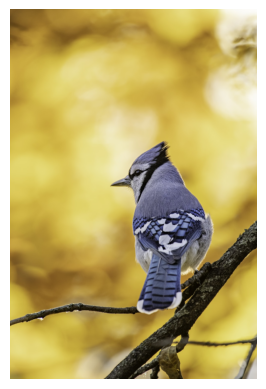

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

# Path to the image you want to display
image_path = "/kaggle/input/bird-pics/2.jpeg"

# Open the image using PIL
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis("off")  # Turn off axis
plt.show()


In [33]:
from tensorflow.keras.preprocessing import image
img1 = image.load_img('/kaggle/input/bird-pics/2.jpeg',target_size=(224,224))
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 23ms/step
4
cmnmyn
